In [2]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Equilibria & Oligopolies

This section introduces the concept of equilibria in games, the paradigm of the prisoner's dilemma, and oligopolies. These concepts are essential to understanding the models we will be studying the next sections, and for relating game theory to its economic applications.

## Equilibrium

The [prisoner's dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) is a classic game first discussed by Merrill Flood and Melvin Dresher in 1950. In this game, there are two prisoners who have been captured and are being interrogated. The prisoners cannot contact each other in any way. They have two options: they can **defect** (betray the other prisoner to the police) or they can **cooperate** (maintain their silence). If both defect, both receive 4 years in prison. If one defects and the other does not, the defector goes free and the cooperator receives 5 years in prison. If both cooperate (meaning neither talks to the police), then they each receive 2 years in prison. We define **mutual defection** as the case when both prisoners defect and **mutual cooperation** as the case when both cooperate. The purpose of this game is to consider how a completely rational person would be best advised to proceed, and how different strategies for playing this game can be more or less effective.

<table>
    
<tr style="background-color: white;"><td></td><td></td><td colspan="2">Prisoner A</td></tr>
<tr><td></td><td></td><td>Cooperate</td><td>Defect</td></tr>
<tr style="background-color: white;"><td rowspan="2">Prisoner B</td><td>Cooperate</td><td style="background-color: #F5F5F5;">A: 2, B: 2</td><td>A: 0, B: 5</td></tr>
<tr><td>Defect</td><td>A: 5, B: 0</td><td style="background-color: #F5F5F5;">A: 4, B: 4</td></tr>
    
</table>

The table above is called a **payoff matrix** and describes the results of a game for each participant given their choice and their opponent's choice. We see that if Prisoner A cooperates and Prisoner B defects, then Prisoner A gets 5 years in prisoner and Prisoner B gets none.

An import concept in game theory is finding the equilibrium of a game. There are different types of equilibria, but the most common one considered is the **Nash equilibrium**, named for the mathematician John Forbes Nash, Jr., (who you may remember as a character played by Russel Crowe in [_A Beautiful Mind_](https://en.wikipedia.org/wiki/A_Beautiful_Mind_(film)). A state of a game is said to be a Nash equilibrium if each player has chosen a strategy and no player can increase its own payoff by changing its strategy, assuming the other player's strategy is unchanged.

Using this definition, what constitutes a Nash equilibrium for the prisoner's dilemma? Well let's consider the four possible combinations of strategies. (We use "D" as shorthand for "defect" and "C" for "cooperate" below.)

1. **Prisoner A: C, Prisoner B: C.** In this case, both Prisoner A and Prisoner B get 4 years. However, if Prisoner A's strategy remains unchanged, Prisoner B can get fewer years in prison by changing to D, and vice versa. Thus, this is **not** a Nash equilibrium.
2. **Prisoner A: D, Prisoner B: C.** In this case, Prisoner B can change to D and lower their years from 5 to 4. Thus, this is **not** a Nash equilibrium.
3. **Prisoner A: C, Prisoner B: D.** As with (2), Prisoner A can change to D and lower their years in prison. Thus, this is **not** a Nash equilibrium.
4. **Prisoner A: D, Prisoner B: D.** In this case, if Prisoner A changes to C, then their years in prison _increases_ from 4 to 5, as with Prisoner B. Neither player can increase their winnings (decrease their years in prison) by changing their strategy. Thus, this **is** a Nash equilibrium.

By describing the four states of the game, we see that only mutual defection is a Nash equilibrium of the prisoner's dilemma.

## Oligopolies

One of the most common applications of game theory in economics is the study of **oligopolies**, markets where competition is limited due to the number of participants. There are several examples of oligopolies that we experience without knowing in daily life: airlines, soft drinks, and cell-service providers, to name a few. Oligopolies are different from regular markets in that they allow their participants to function similar to a monopoly by setting prices as a group; groups of participants conspiring on this kind of illicit activity are referred to as **cartels**. 

Within oligopolies, however, we can observe competition more like a normal market as firms attempt to take market share from one another. When cartels set prices (by limiting the production of the good or service provided by their market), a firm can make a bid for market share by ignoring the agreed-upon production level and producing more. This has the effect of lowering the price of the good but the increase in production by the renegade firm will allow them to make up for the lost marginal revenue through increased sales volume. In this way, oligopoly members can compete against each other, making the market more and more competitive.

A prime example of this type of within-cartel competition was observed in the [2020 oil price war between Russia and Saudi Arabia](https://en.wikipedia.org/wiki/2020_Russia%E2%80%93Saudi_Arabia_oil_price_war). Both countries are members of [OPEC (Organization of Petroleum Exporting Countries)](https://en.wikipedia.org/wiki/OPEC), an oil cartel that consists of 12 member countries controlling 79% of the world's oil reserves and 44% of oil production. OPEC sets oil prices by limiting the output if its member countries (a decrease in production results in higher prices).

The price war began when Saudi Arabia discounted its oil in response to Russia's refusal to reduce production in accordance with OPEC's directive. OPEC's members had agreed to reduce oil production due to a low forecasted demand for oil due to the COVID-19 pandemic. When Russia (who was not an official member of OPEC but had agreed to cooperate with Saudi Arabia to manage oil prices) didn't abide  by OPEC's decision, Saudi Arabia announced discounts on its oil, starting the price war and leading to a massive drop in the price of oil. We can see the effects of this price war by looking at the stock price of the United States Oil Fund, an [ETF (exchange-traded fund)](https://en.wikipedia.org/wiki/Exchange-traded_fund) that tracks oil prices.

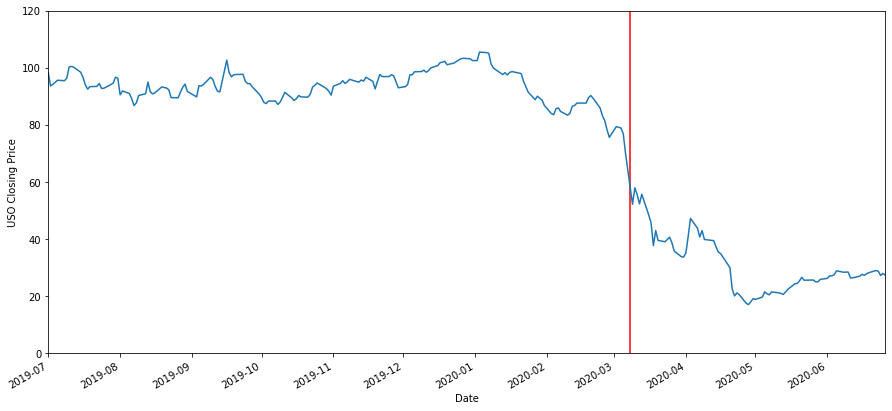

In [3]:
uso = Table.read_table("USO.csv")
dates = uso.apply(pd.to_datetime, "Date")
uso = uso.with_column("Date", dates)
uso.to_df().plot.line("Date", "Close", figsize=[15,7], legend=False)
plt.vlines(dt.datetime(2020, 3, 8), -5, 125, color="r")
plt.ylim(0, 120)
plt.xlim(min(uso.column("Date")), max(uso.column("Date")))
plt.ylabel("USO Closing Price");

The plot above marks the official start of the price war on March 8, 2020, in red. We see some precipitous drops both just before and for a while after the start of the price war, indicating the effect that it is having on oil prices. While there are some confounding variables here (hi there, COVID-19), we still see a serious drop in price that is not just attributable to the stock market volatility that experienced by the rest of the market in early 2020.